<div style="border:solid black 2px; padding: 20px">
<b>Инна, привет!</b>

Меня зовут Полина Бережная, и я буду делать ревью проекта по машинному обучению. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

Мне было очень приятно проверять твой проект, так как чувствуется твое старание и желание сделать задание на достойном уровне. Ты воплнил задание на очень высоком уровне! Однако есть один аспект по тестированию, который требуют твоего внимания и доработки. 
    
В тетрадке ты можешь встретить 4 вида моих комментариев:
- <div class="alert alert-danger">
  <h3>Комментарий ревьюера</h3> Такой нюанс требует обязательной доработки, иначе проект не будет принят.
  </div>
    
    
- <div class="alert alert-warning">
  <h3>Комментарий ревьюера</h3> Так выделены не обязательные к доработке моменты. Mожешь учесть их при редактировании проекта и выполнении будущих заданий. На твое усмотрение.
  </div>
    
    
- <div class="alert alert-success">
  <h3>Комментарий ревьюера</h3> Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    
    
- <div style="border:solid black 2px; padding: 20px">
  <h3>Чек-лист доработок</h3> Такой комментарий будет находиться в конце тетрадки. В нем будут еще раз указаны нюансы, требующие обязательной корректировки.
  </div>

Предлагаю работать над проектом в форме диалога: если ты **что-то меняешь** в работе по моим рекомендациям — **пиши об этом** и помечай комментарий каким-то заметным цветом. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Такой формат работы поможет выполнить повторную проверку твоего проекта оперативнее.
    
Не переживай, если что-то не получилось сделать идеально с первого раза. Основная цель нашей команды - не найти ошибки, а поделиться своим опытом и помочь тебе стать профи в аналитике 🙂
    
Жду твой проект на повторное ревью, ты уже почти на финише!

</div>

<div style="border:solid black 2px; padding: 20px">
<b>Инна, привет!</b>

Ты отлично поработала и подправила все нюансы. Проект принят. Ты умница 🙂
    
Желаю успехов тебе во всех будущих начинаниях!

## Аналитика данных фитнес-центра «Культурист-датасаентист» 

### Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

•	научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

•	сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

•	проанализировать основные признаки, наиболее сильно влияющие на отток;

•	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

o	1) выделить целевые группы клиентов;

o	2) предложить меры по снижению оттока;

o	3) определить другие особенности взаимодействия с клиентами.


### Содержание
1. [Подготовка данных](#start)
2. [Исследовательский анализ данных (EDA)](#analysis)
3. [Модель прогнозирования оттока пользователей](#model)
4. [Кластеризация пользователей](#users)
5. [Вывод](#output)

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Здорово, что перед кодом есть описание задач проекта и план твоих действий. Да и все оформление тетрадки выполнено на достойном уровне. Она рассказывает историю за тебя и показывает как твои кодинговые навыки, так и умение анализировать и преподносить информацию 👍🏻
    
Отдельное спасибо за навигацию по тетрадке!
</div>

<a id="start"></a>
### 1. Подготовка данных

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [13]:
data = pd.read_csv('/datasets/gym_churn.csv', sep=',')
display(data.head())
data.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В датасете 14 столбцов и 4 000 строк. Пропущенных и аномальных значений нет. Типы данных: "вещественные числа" и "целые числа" корректны. 
Названия столбцов:

•	'Churn' — факт оттока в текущем месяце;

Данные пользователя за предыдущий до проверки факта оттока месяц:
 - 'gender' — пол
 - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
 - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
 - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
 - 'Phone' — наличие контактного телефона
 - 'Age' — возраст
 - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
 - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
 - 'Group_visits' — факт посещения групповых занятий
 - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
 - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
 - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон



<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Ты отлично владеешь методами первичного изучения данных 👍🏻 

Также полезно проверять данные на дубликаты.
</div>

<a id="analysis"></a>
### 2. Исследовательский анализ данных (EDA)

Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [14]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По средним значениям можно определить, что в датасете представлено примерное равное количество мужчин и женщин, в основном проживающих рядом с фитнес-центром, чуть меньше половины клиентов - сотрудники компаний-партнеров. Возраст клиентов от 18 до 41, в среднем - 29. Ср.длительность абонемента - 4,7 месяцев, ср.частота посещений в неделю - 1,8. Ср.коэффициент оттока - 0,3.

<div class="alert alert-warning">
<h3> Комментарий ревьювера</h3>
    
Хотелось бы обратить внимание, например, на переменные Group_visits, Age и Avg_additional_charges_total. У них очень разные средние и очень разные по величине стандартные отклонения.
Это говорит о том, что переменные нужно стандартизировать. Для логистической регрессии и дерева это не обязательно, но вообще это уже такое внегласное правило. Лучше сразу стандартизировать все, а потом уже гонять модели.
</div>

In [6]:
def out_violet(text):
    print("\033[35m {}" .format(text))

In [31]:
out_violet("Полина, привет! Рада знакомству. Спасибо большое. Я буду делать пометки фиолетовым цветом. Теперь понятно, что именно нужно смотреть в результате функции describe().")

 Полина, привет! Рада знакомству. Спасибо большое. Я буду делать пометки фиолетовым цветом. Теперь понятно, что именно нужно смотреть в результате функции describe().


Сравним средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [16]:
churn_mean = data.groupby(['Churn']).agg({'mean'}).reset_index()
display(churn_mean)

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По гендерному признаку различий по категориям нет. Немногим больше осталось тех, кто живет рядом и посещает групповые занятия. Осталось больше половины сотрудников компаний-партнеров, а также тех, кто пришел по акции "Приведи друга". Клиенты с длительностью контракта более 5 месяцев остались, около 1,7 месяцев - ушли. Остались клиенты с частотой посещения 2 раза в неделю, ушли -  с 1,4 раза в неделю.

Построим столбчатые гистограммы для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

<div class="alert alert-danger">
<h3> Комментарий ревьювера</h3>
    
Для количественных признаков лучше построить гистограммы на них будет четче видно разницу в распределениях.
</div>

In [76]:
out_violet('Некорректный график удален, т.к. ниже есть более точные гистограммы количественных признаков?')

 Некорректный график удален, т.к. ниже есть более точные гистограммы количественных признаков?


<div class="alert alert-success">
<h3> Комментарий ревьювера v2</h3>

👍🏻 

По оставшимся клиентам все признаки выше, чем у клиентов в оттоке. Особенно, суммарная выручка от других услуг фитнес-центра, возраст, длительность контракта, время с момента первого обращения. Можно предположить, что в отток ушли непостоянные, случайные клиенты, без длительных контрактных отношений, а также те, кто приносил меньше дохода фитнес-центру.

Создадим сводную таблицу для суммирования значений признаков по категориям оттока и оставшихся

In [18]:
churn_count = data.groupby(['Churn']).agg({'sum'}).reset_index()
display(churn_count)

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,0,1499,2566,1570,1039,2656,16891,1364,88101,465671.955802,15527.0,13848,5951.109513,5959.944414
1,1,542,815,377,195,958,1834,285,28636,122102.955435,1764.0,1051,1564.969337,1108.262875


Построим столбчатые гистограммы для сравнения количества значений в каждом признаке.

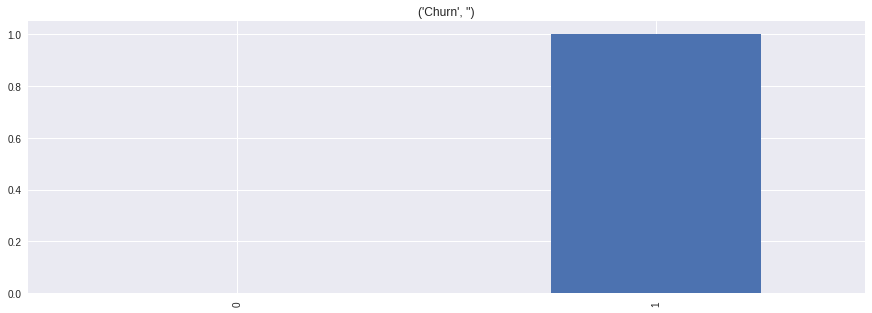

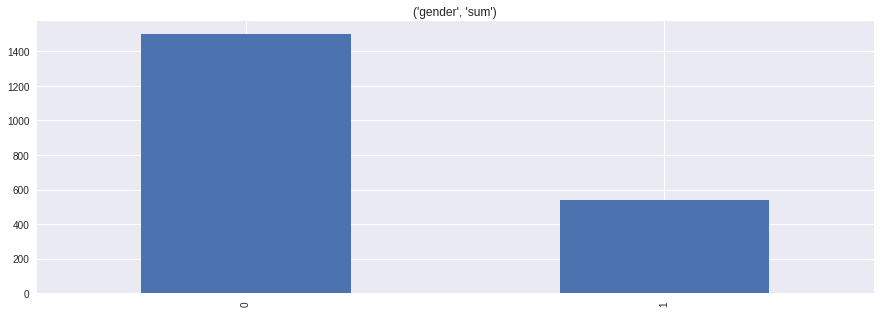

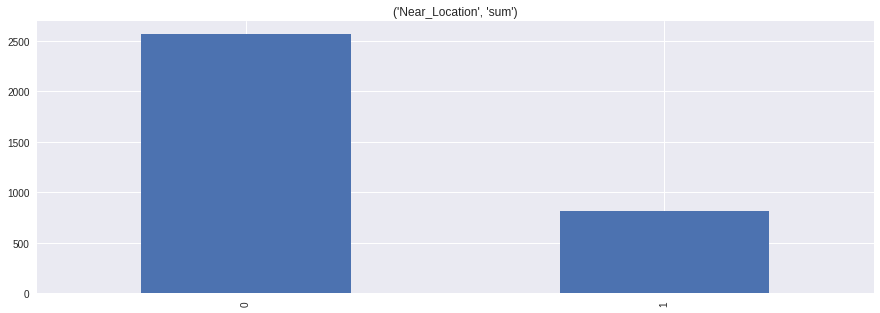

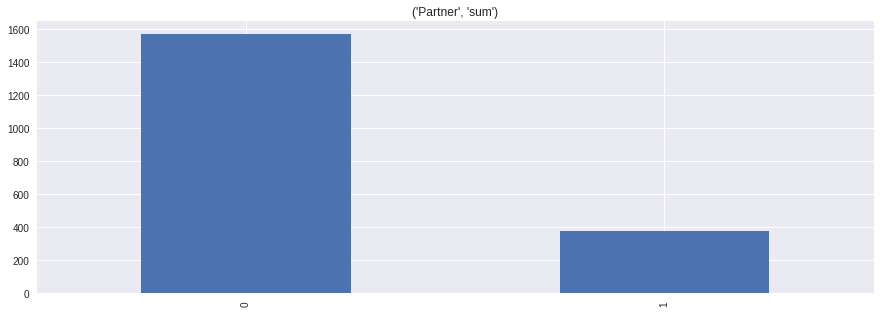

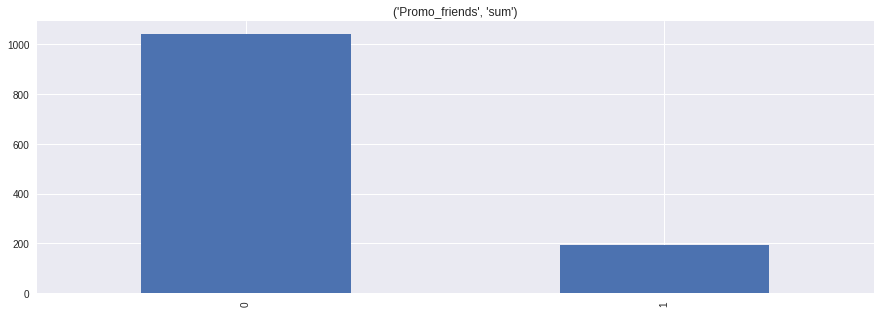

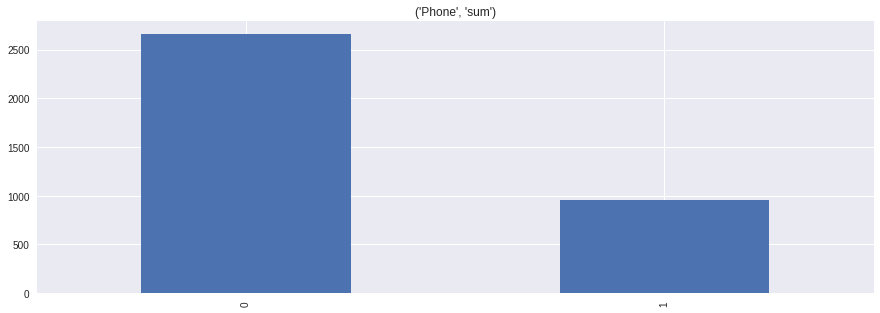

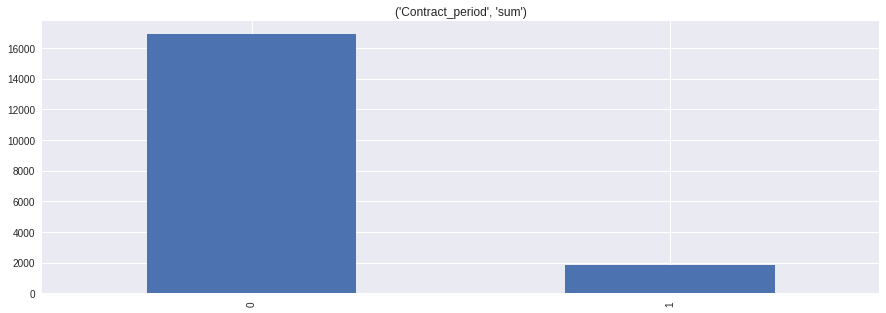

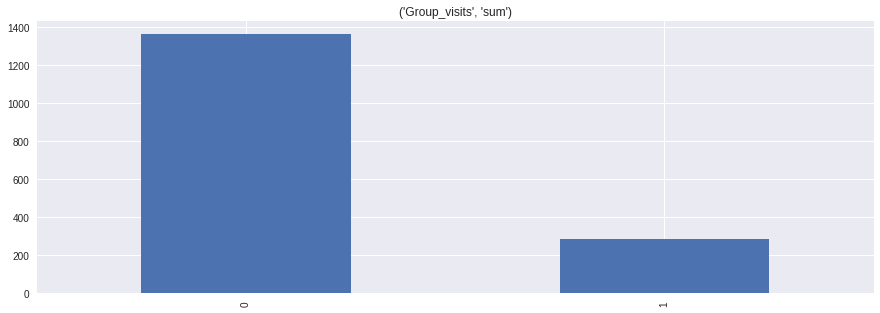

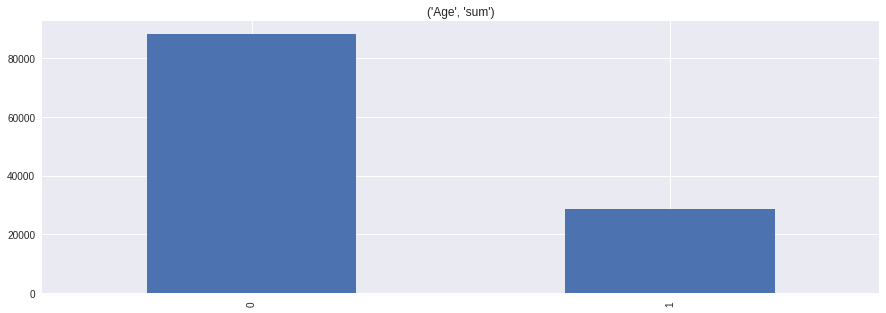

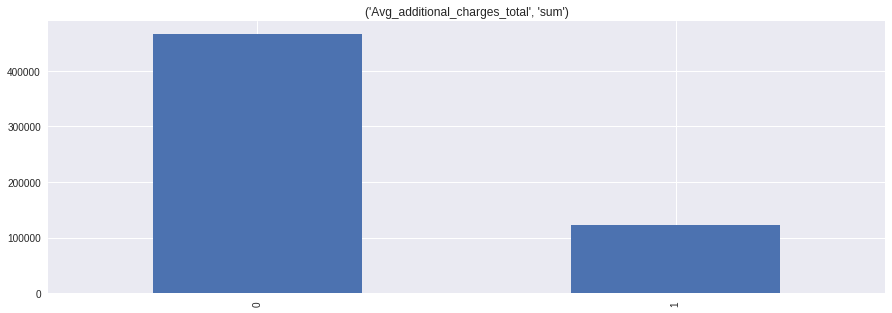

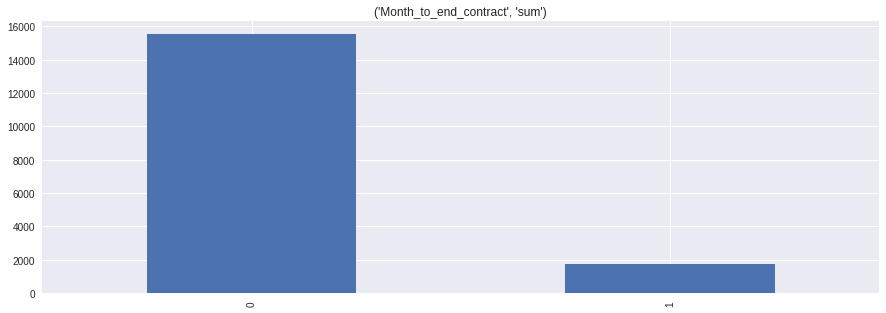

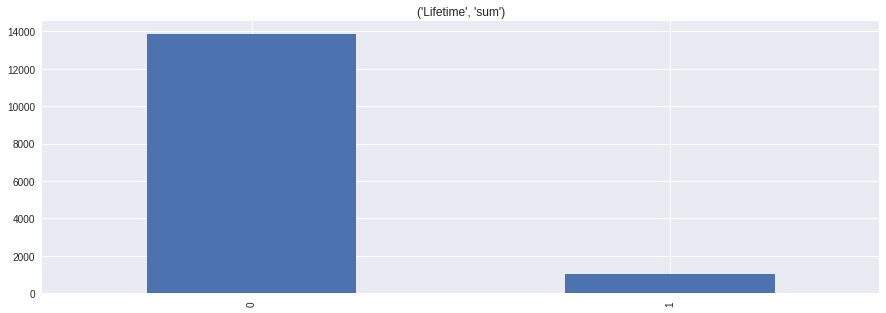

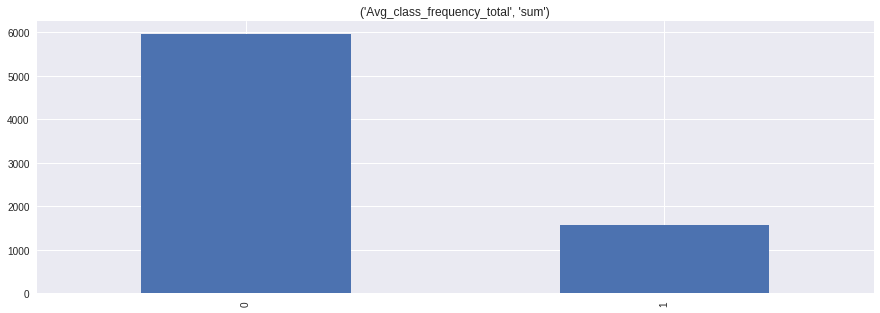

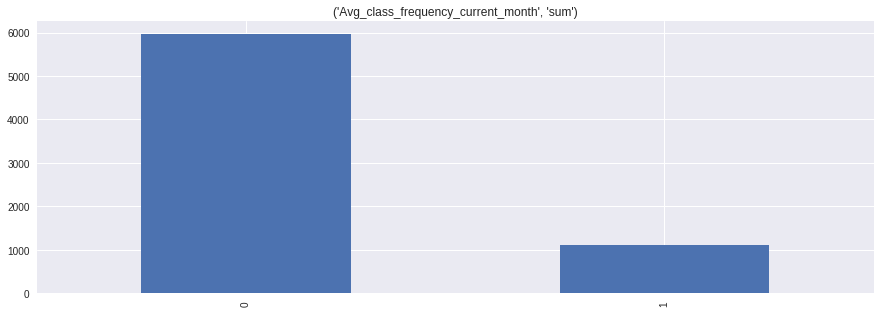

In [19]:
for feature_1 in churn_count.columns:
    plt.style.use('seaborn')
    churn_count[feature_1].plot(kind='bar', figsize=(15,5), grid=True)
    plt.title(feature_1)
    plt.show()
    
   

По признаку 'Near location' оставшихся больше в 3 раза. По признаку 'Partner' в отток ушли в 4-5 раз меньше, чем осталось. Из тех, кто пришел по акции "Приведи друга" ушла только 6-я часть. Большинство, кто посещает групповые визиты осталось (из 1400 ушло 300 человек). Фитнес-центр потерял около 112 тыс.рублей за доп.услуги, т.к. данные клиенты попали в отток. 

Построим гистограммы распределения признаков в оттоке и оставшихся клиентах

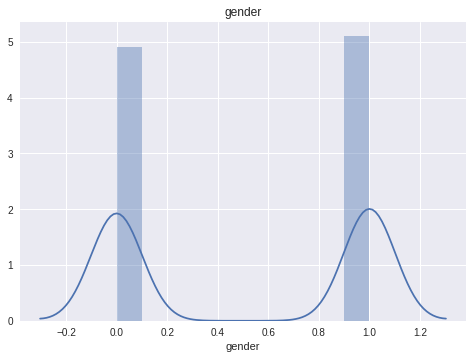

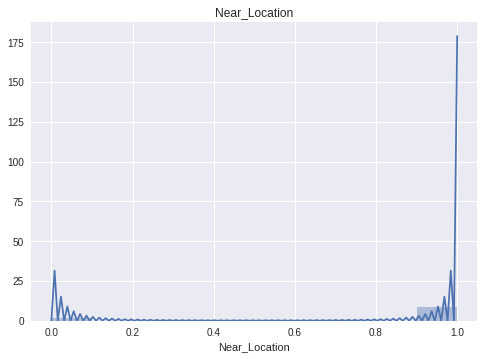

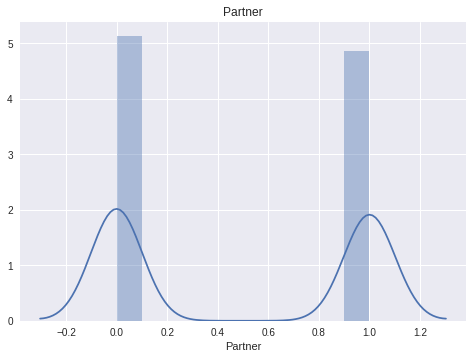

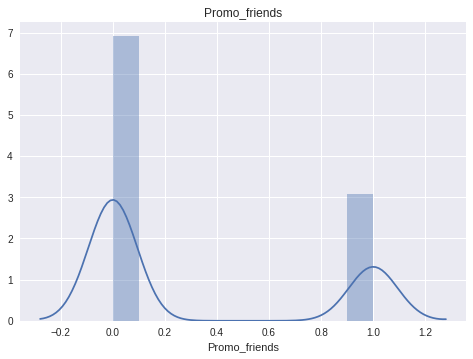

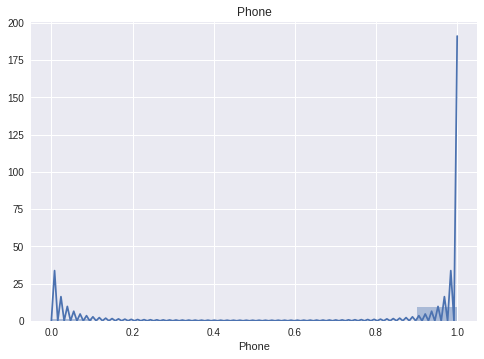

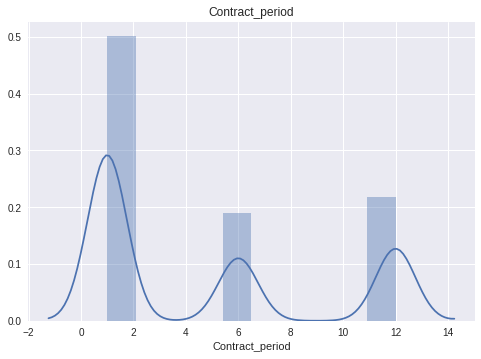

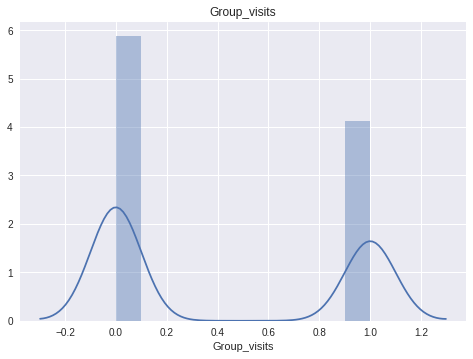

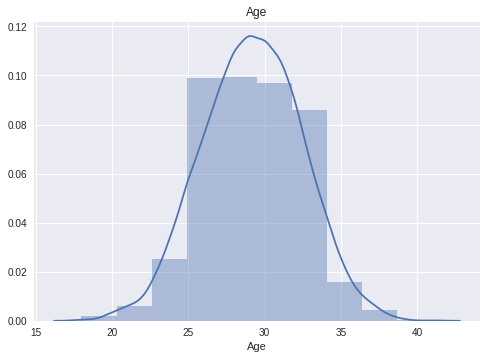

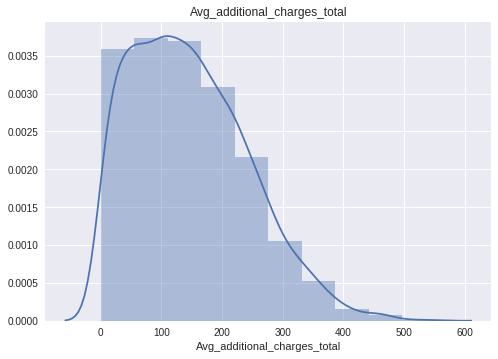

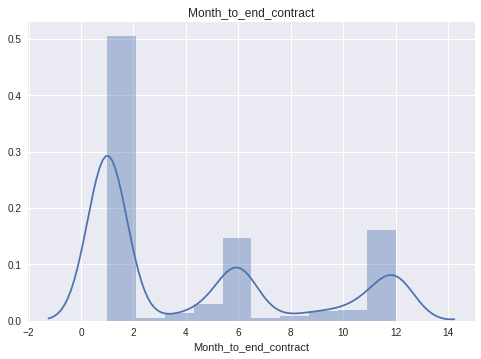

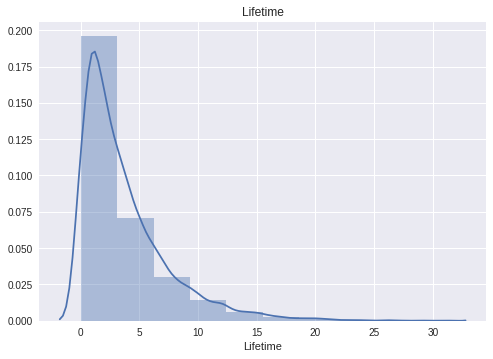

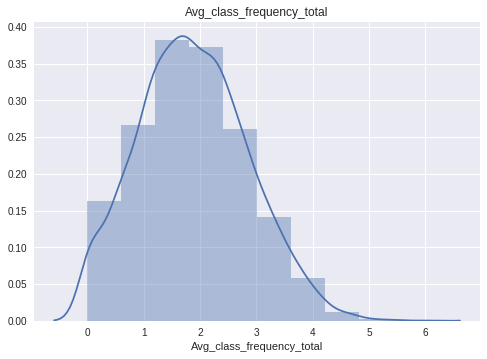

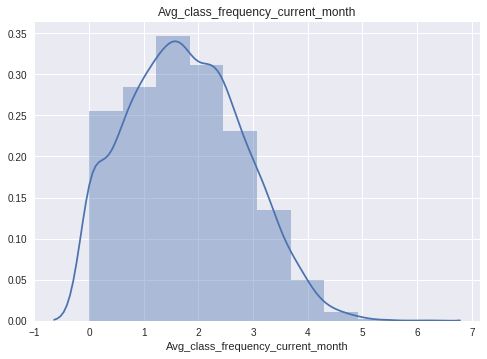

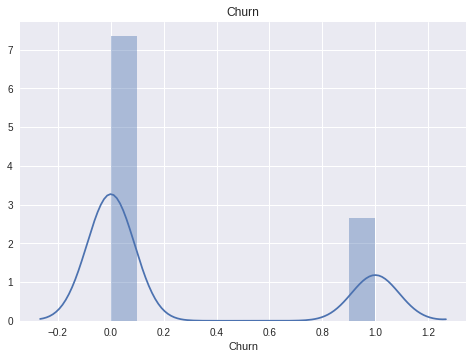

In [20]:
for feature in data.columns:
    sns.distplot(data[feature], bins = 10)
    plt.title(feature)
    plt.show()

Распределение признаков 'gender', 'partner', 'promo friends', 'group visits' представляют собой два бинарных значения, т.к. могут использоваться только два варианта ответов ('да или нет', 'мужской или женский'). Нормально распределены 'Avg_class_frequency', 'Avg_class_frequency_current_month', 'age'. Распределение 'Avg_additional_charges' и 'Lifetime' больше похоже на пуассоновское. Возможно, срок контракта фиксированы по трем значениям: 2, 6, 12, поэтому график представлен тремя столбцами

Построим матрицу корреляций 

In [21]:
corr_matrix = data.corr()

Отобразим матрицу с помощью тепловой карты

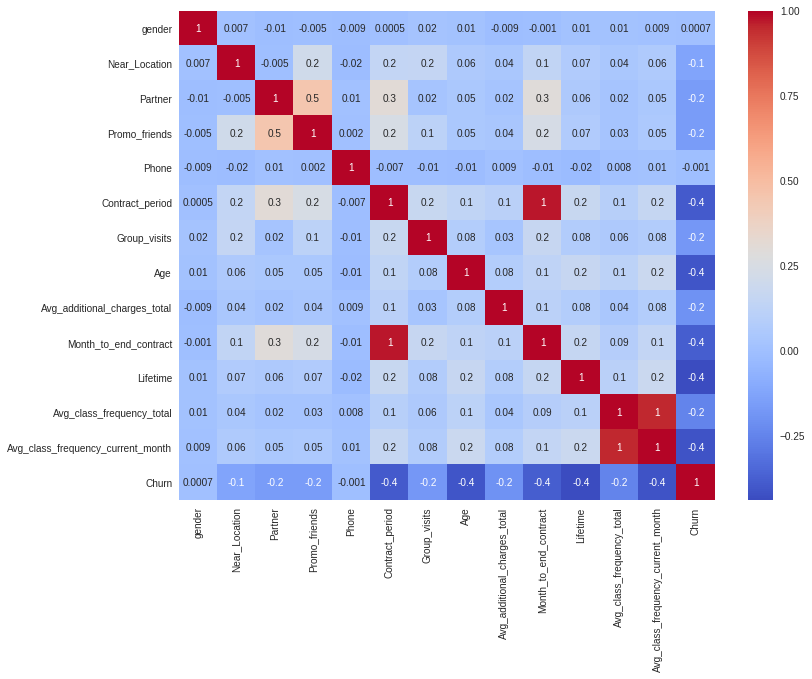

In [22]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap= 'coolwarm')

Сильно коррелируют между собой признаки 'Contract_period' и 'Month to end contract', 'Avg class frequency total' и 'Avg class frequency current month'. Средний коэффициент корреляции у признаков 'Promo friends' и 'Partner', все остальные признаки практически не коррелируют между собой.

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Супер! Ты выполнила отличный EDA 👍🏻 Все главные моменты отмечены и прокомменттрованы. Это самое подробное исследрвание перед обучением, что я встречала в выполненных проектах по данной теме.
   
</div>

<a id="model"></a>
### 3. Модель прогнозирования оттока пользователей


Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.


Разделяем данные на признаки (матрица X) и целевую переменную (y)

In [23]:
X = data.drop('Churn', axis = 1) 
y = data['Churn'] 

Разбиваем данные на обучающую и валидационную выборку

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

<div class="alert alert-warning">
<h3>Комментарий ревьюера</h3>

Может быть так, что при разделении на выборки почти все наблюдения класса 1 попадут, например, в валидационную выборку:
  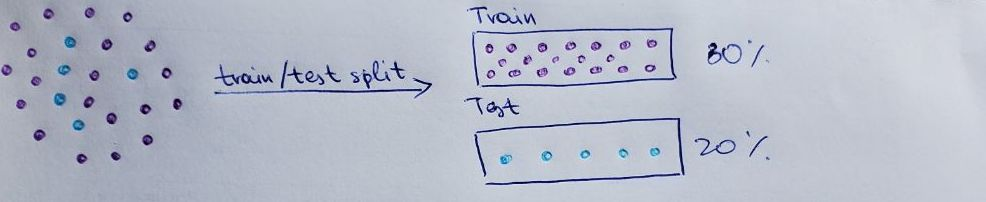
    
Модель не получится хорошо обучить, и финальные результаты будут не очень приятными. Модель не сможет классифицировать клиентов, склонных к оттоку, так как она их не видела на этапе обучения.

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:
  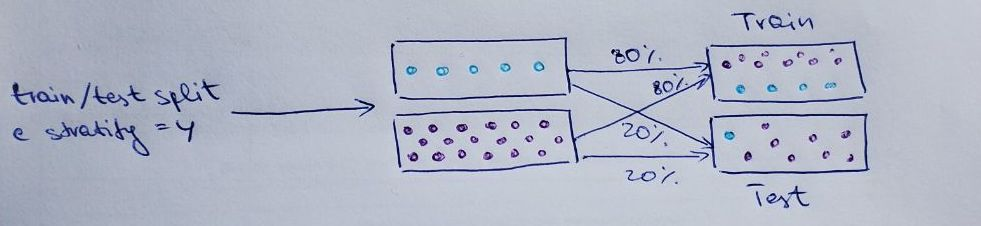
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.

</div>

In [82]:
out_violet('Спасибо, что очень понятно объяснила. Конечно, я это поправлю. Данный параметр следует вводить всегда или в каких-то особых случаях?')

 Спасибо, что очень понятно объяснила. Конечно, я это поправлю. Данный параметр следует вводить всегда или в каких-то особых случаях?


<div class="alert alert-success">
<h3> Комментарий ревьювера v2</h3>

Как правило мы его включаем всегда. Но идейно его обычно используют при дисбалансе классов в выборке :)

Задаем алгоритм **логистической регрессии** для модели

In [32]:
lr_model = LogisticRegression() 

Обучим модель **логистической регрессией**

In [33]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Сделаем бинарный прогноз

In [34]:
predictions = lr_model.predict(X_test)

Зададим алгоритм **случайного леса** для новой модели

In [35]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Обучим модель случайного леса

In [36]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Делаем прогноз с помощью обученной модели

In [37]:
rf_predictions = rf_model.predict(X_test)


Оценим метрики accuracy, precision и recall для модели **логистической регрессии** на валидационной выборке. 

In [47]:
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))



Метрики для модели логистической регрессии:
Accuracy: 0.93
Precision: 0.89
Recall: 0.84


Оценим метрики accuracy, precision и recall для модели **случайного леса** на валидационной выборке. 

In [46]:
print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели случайного леса:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


Показатели метрик очень близки, т.к. для задач бинарной классификации возможно применение обоих алгоритмов - логистическая регрессии и случайного леса. Но модель логистической регрессии отработала чуть лучше по всем трем метрикам.

Полученная модель прогноза оттока теперь может использоваться для выделения сегмента пользователей, склонных к оттоку, с которыми затем проводятся маркетинговые коммуникации с целью удержания.

<div class="alert alert-danger">
<h3> Комментарий ревьювера</h3>

Почему согласно прогнозам факт оттока пользователей случится и в следующем месяце на 80-90%?
   
</div>

In [44]:
out_violet('Я исправила вывод.')

 Я исправила вывод.


<div class="alert alert-success">
<h3> Комментарий ревьювера v2</h3>

👍🏻 

<a id="users"></a>
### 4.Кластеризация пользователей

Удалим столбец с оттоком и стандартизируем данные. Стандартизация приведёт значения признаков к виду стандартного нормального распределения: значения будут центрированы относительно 0, а средний разброс данных составит 1. 

<div class="alert alert-danger">
<h3> Комментарий ревьювера</h3>

А почему ты говоришь и о нормализации и о стандартизации? :) 
   
</div>

In [45]:
out_violet('Убрала текст о нормализации.')

 Убрала текст о нормализации.


<div class="alert alert-success">
<h3> Комментарий ревьювера v2</h3>

👍🏻 

In [48]:
scaler = StandardScaler() 
X_st = scaler.fit_transform(data.drop(columns = ['Churn'])) 

Чтобы провести кластеризацию пользователей нам необходимо понять степень их близости к друг другу или численного значения расстояния между ними.
 
Для матрицы расстояний используем функцию linkage() 

In [49]:
linked = linkage(X_st, method = 'ward')

Визуализируем матрицу расстояний в виде дендрограммы

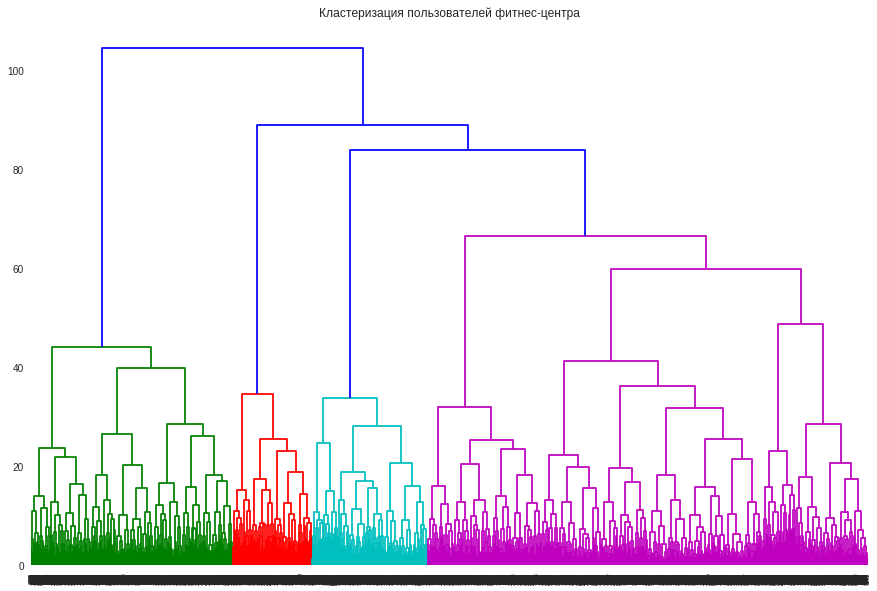

In [50]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей фитнес-центра')
plt.show()


Модель предлагает разделить всех пользователей на 4 кластера, довольно разных по своей структуре.


<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Все корректно 👍🏻 
</div>

Также спрогнозируем кластеры на основании более быстрого алгоритма K-Means. За число кластеров примем n=5. 

In [51]:
km = KMeans(n_clusters = 5) 

Прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 3)

In [52]:
labels = km.fit_predict(X_st) 

Сохраняем метки кластера в поле нашего датасета

In [53]:
data['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров

In [54]:
display(data.groupby(['cluster_km']).mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.555822,0.858343,0.331333,0.188475,0.9988,2.687875,0.452581,30.128451,163.694112,2.477791,4.987995,2.921296,2.925279,0.052821
1,0.511509,0.750639,1.000000,0.453964,1.0000,2.552430,0.303069,28.520460,130.197606,2.368286,2.836317,1.355531,1.177288,0.393862
2,0.481552,0.811731,0.000000,0.087039,1.0000,1.860927,0.322611,28.157048,131.658081,1.785241,2.340587,1.315824,1.075468,0.552507
3,0.496288,0.942736,0.750795,0.542948,1.0000,11.325557,0.562036,30.004242,164.386953,10.355249,4.815483,2.036701,2.028885,0.023330
4,0.522078,0.862338,0.470130,0.306494,0.0000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


По средним значениям можно заметить, что кластеры распределены равномерно по количеству и возрасту пользователей. 

Отдельно выведены группы пользователей по следующим признакам: 

- не работающие в компаниях-партнерах, 
- пришедшие вне акции "Приведи друга", 
- не указавшие номер телефона, 
- являющиеся клиентами фитнес-центра в течение полугода
- посещающие центр более 2х раз в неделю
- имеющие годовой абонемент

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Абсолютно верно 👍🏻 
</div>

Построим распределения всех признаков для кластеров

<div class="alert alert-danger">
<h3> Комментарий ревьювера</h3>

График распределения — это тот, по которому можно оценить симметричность, среднее, стандартное отклонение, выбросы и т.д.
    
Нужно подправить :)
   
</div>

In [77]:
out_violet('Убрала неверный график')

 Убрала неверный график


<div class="alert alert-success">
<h3> Комментарий ревьювера v2</h3>

👍🏻 

Создадим функцию по построению диаграмм распределения ("ящика с усами") по каждому признаку.
Предварительно оставив только столбцы с бинарными значениями или значениями в пределах 10

In [89]:
data_2 = data.drop(columns = ['Near_Location', 'Age','Avg_additional_charges_total', 'Churn', 'Contract_period'])

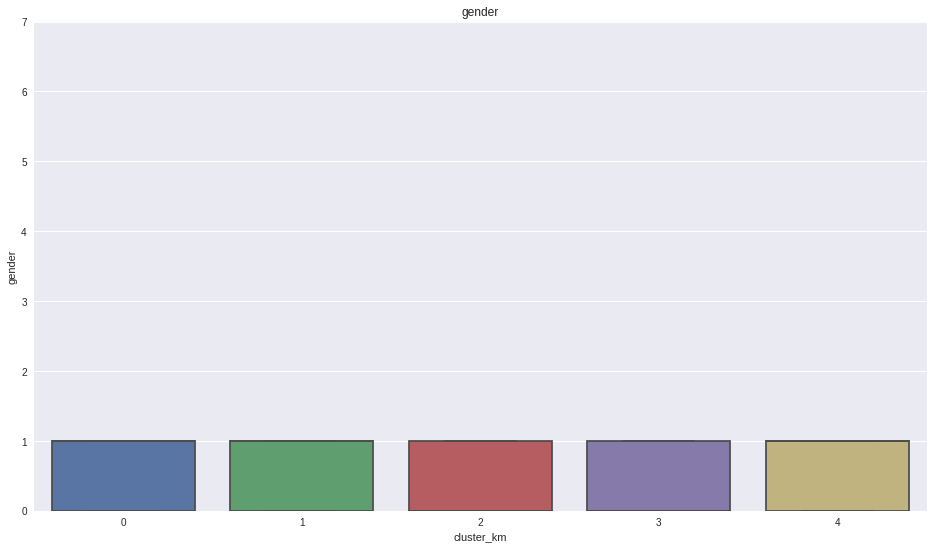

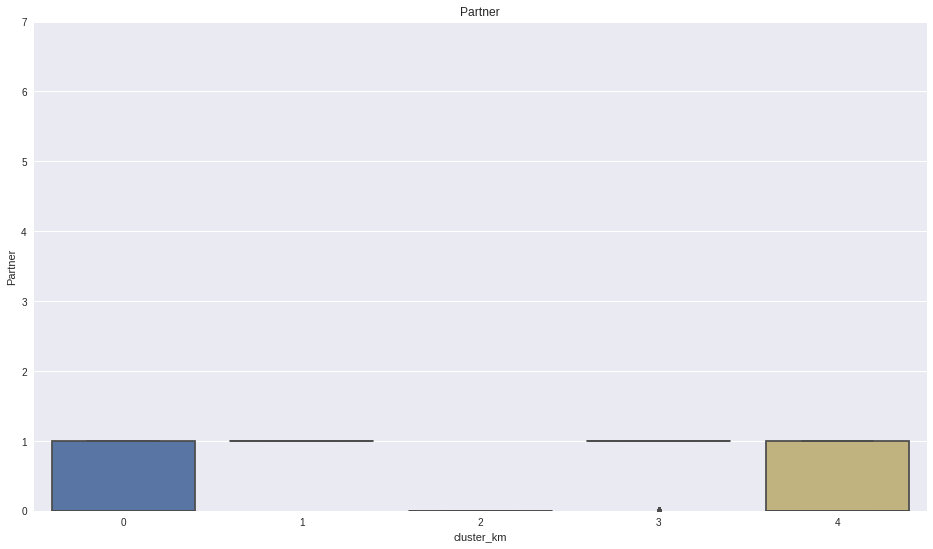

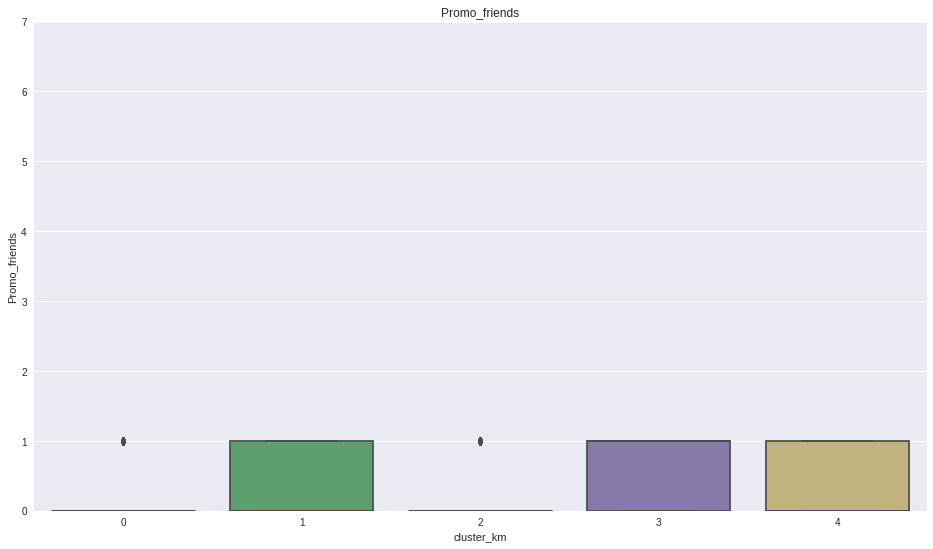

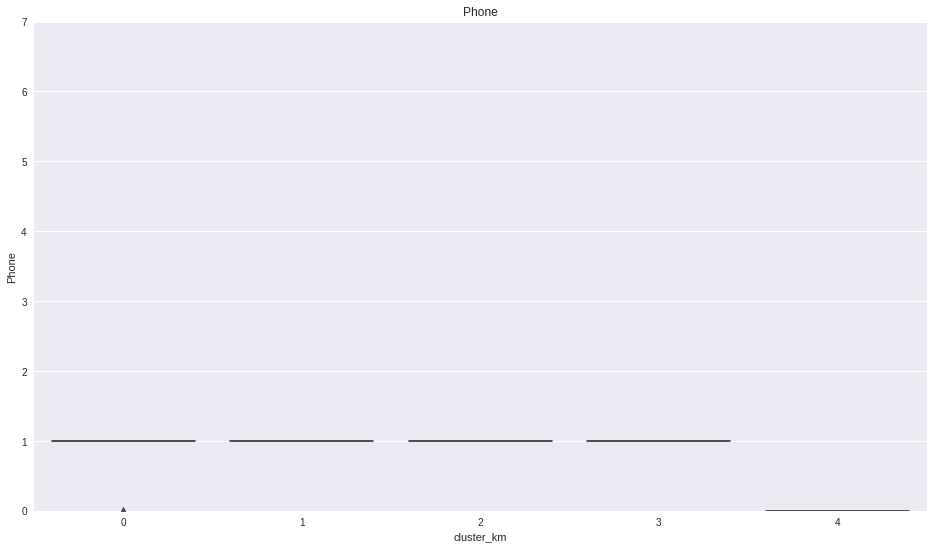

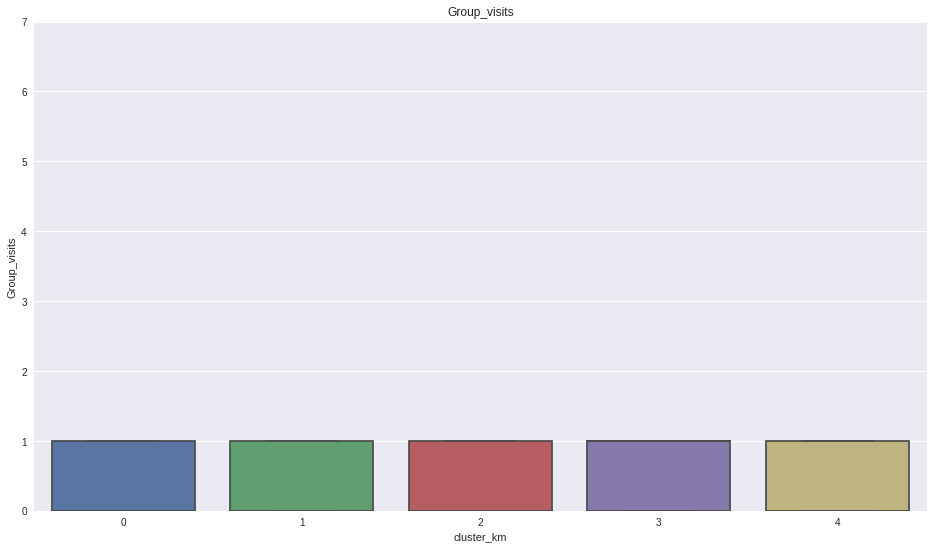

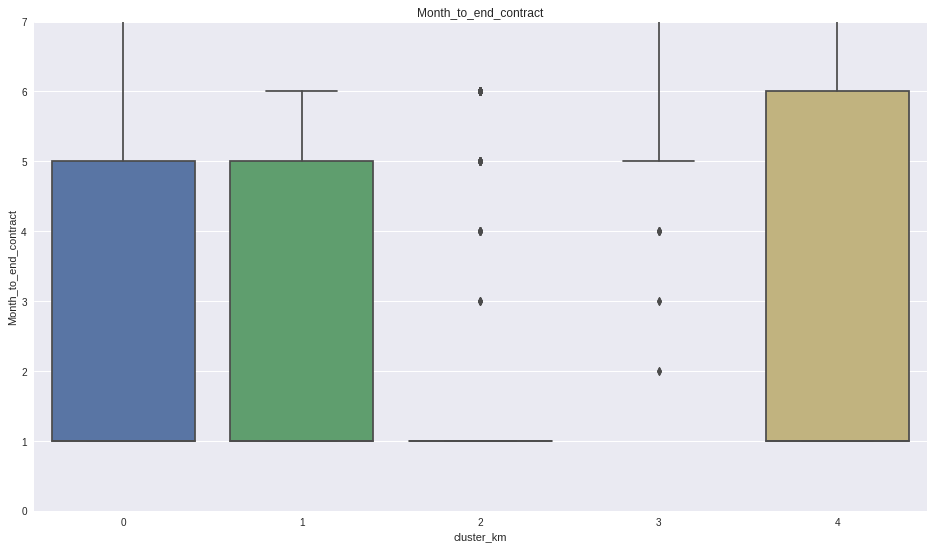

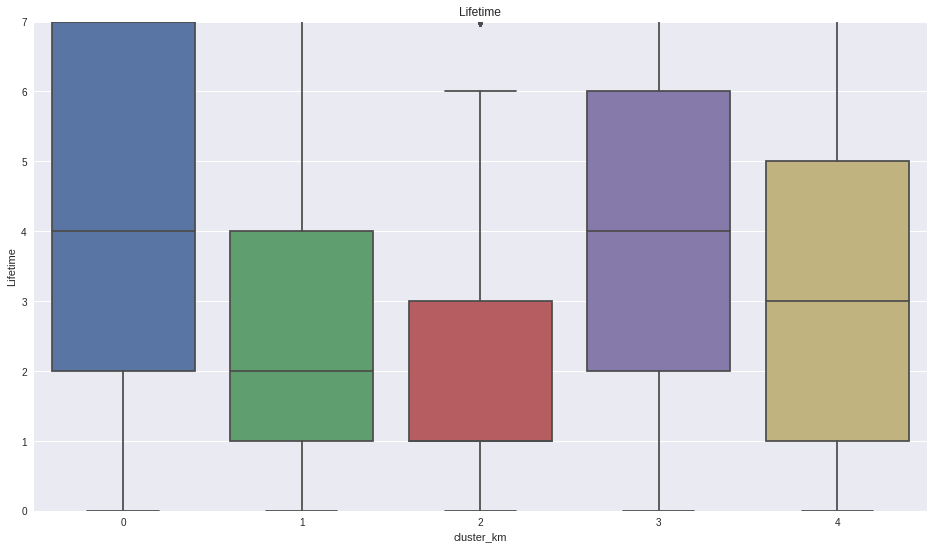

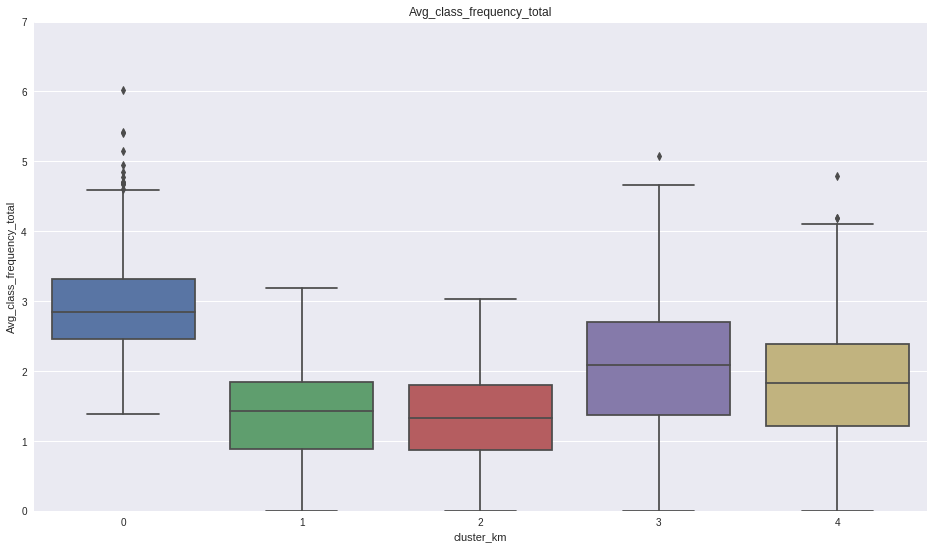

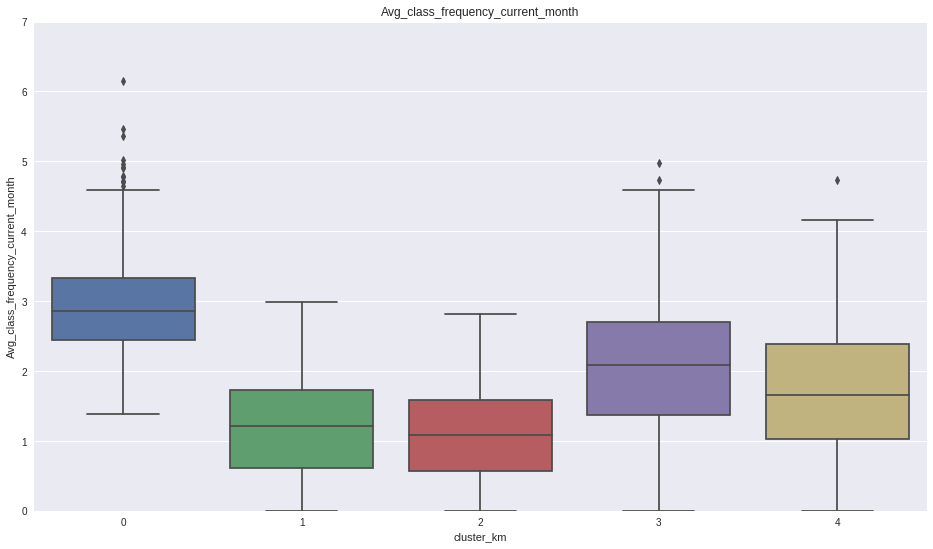

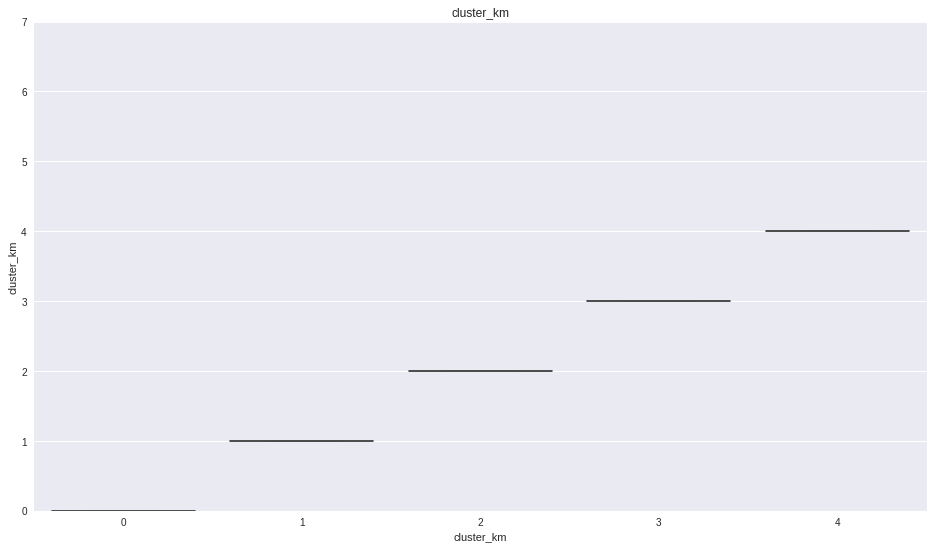

In [102]:
for feature_2 in data_2.columns:
    plt.figure(figsize = (16,9))
    sns.boxplot(x='cluster_km', y=feature_2, data=data_2)
    plt.ylim(0,7)
    plt.title(feature_2)
    plt.show()

- гендер, посещение групповых занятий: по данным признакам кластеры распределены равномерно;
- компания-партнер: в кластере 2 нет сотрудников компаний-партнеров. А в кластерах 1 и 3 большинство таких сотрудников;
- акция "Приведи друга": в кластерах 0 и 2 совсем мало таких клиентов, по остальным кластерам данный признак распределен равномерно;
- контактный номер: только в кластере 4 вообще нет контактных номеров. 
- срок до окончания абонемента: в кластере 3 собраны новички, абонемент кластера 2 скоро закончится. До окончания абонемента остальных кластеров осталось 5-6 месяцев;
- срок с момента первого обращения в фитнес-центр: кластер 0 - самые преданные клиенты (до 1 года), но в среднем кластеры 0 и 3 имеют 4-месячный срок. Кластер 2 -самый молодой (от 1 до 3 мес.), но его ср.значение кластера равно ср. кластера 1 - 2 месяца. Кластер 4 - от 1 до 5 мес. со ср.значением 3 мес.;
- средняя частота посещений в неделю за все время и за прошлый месяц: большинство кластеров это посещения от 1 до 2 раз в неделю, кластер 0 - это клиенты, которые посещают зал чаще всех - почти 3 раза в неделю, в среднем, возможно, т.к. это самый долговечный кластер.

Построим графики распределения по остальным признакам с более высокими значениями

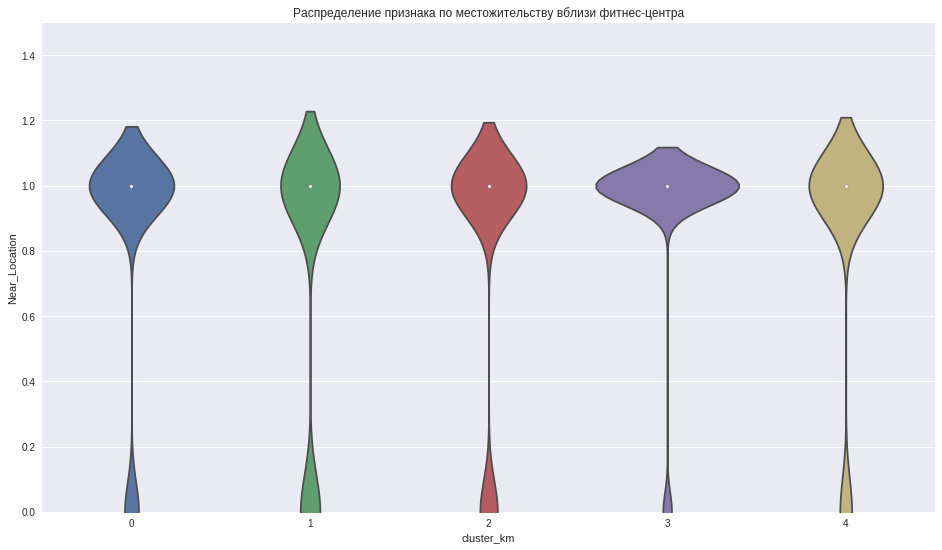

In [103]:
plt.figure(figsize = (16,9))
sns.violinplot(x='cluster_km', y='Near_Location', data=data)
plt.ylim(0,1.5)
plt.title('Распределение признака по местожительству вблизи фитнес-центра')
plt.show()

В среднем, данный признак распределен равномерно, почти все кластеры живут поблизости от фитнес-центра.

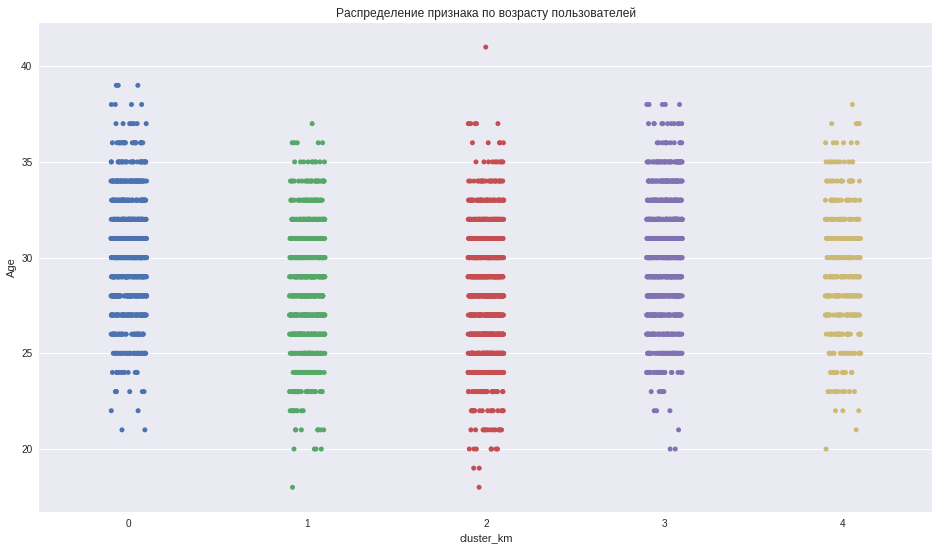

In [105]:
plt.figure(figsize = (16,9))
sns.stripplot(x='cluster_km', y='Age', data=data)
plt.title('Распределение признака по возрасту пользователей')
plt.show()

Средний возраст по всем кластерам 28-30. Самые молодые в кластере 2 от 10 до 37 лет. Самые взрослые  в кластере 0 - 25-39 лет. Все остальные - от 20  до 37 лет.

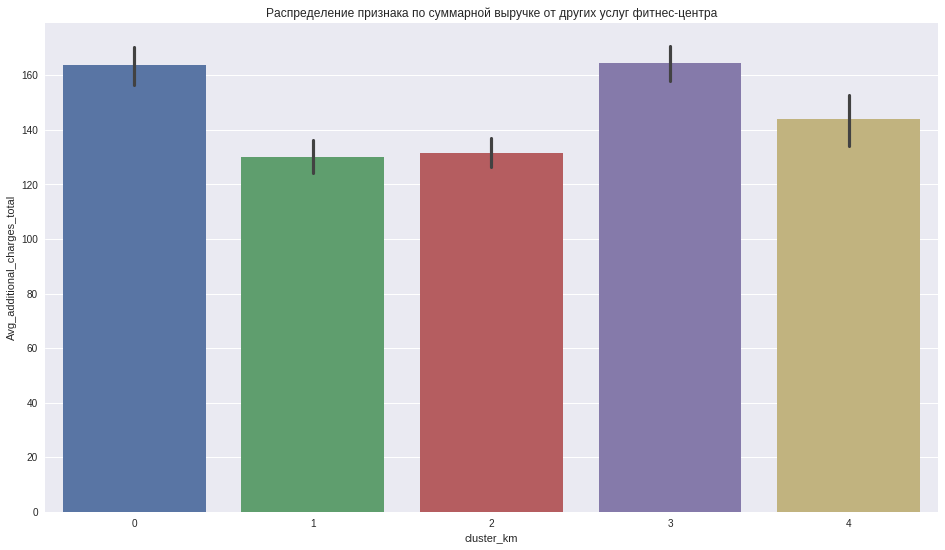

In [108]:
plt.figure(figsize = (16,9))
sns.barplot(x='cluster_km', y='Avg_additional_charges_total', data=data)
plt.title('Распределение признака по суммарной выручке от других услуг фитнес-центра')
plt.show()

Кластеры 0 и 3 приносят больше всего выручки по другим услугам (163 тыс.). Менее всего кластеры 1 и 2 - около 130 тыс. Кластер 4 в среднем приносит 142 тыс.

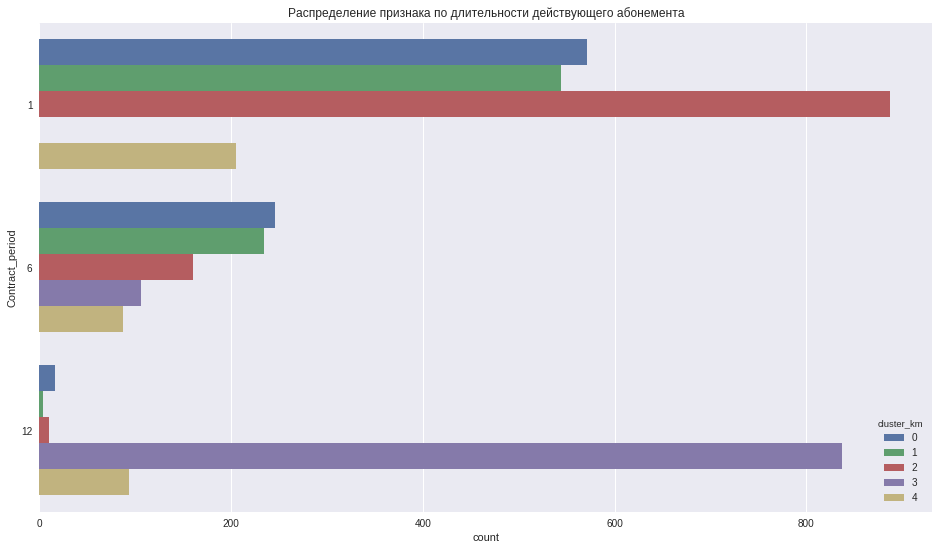

In [112]:
plt.figure(figsize = (16,9))
sns.countplot(y='Contract_period', hue='cluster_km', data=data)
plt.title('Распределение признака по длительности действующего абонемента')
plt.show()

Скорее всего, есть три фиксированных срока абонемента: 1, 6, 12 месяцев. Кластеры по данным срокам распределены следующим образом:

1 месяц - больше всего пользователей из кластера 2, далее идут кластеры 0, 1 и 4

6 месяцев - в основном, кластеры 0, 1, 2. В меньшей степени 3 и 4.

12 месяцев - большая часть кластера 3, совсем немного пользователей кластера 4. Незначительное количество пользователей из других кластеров.

<div class="alert alert-danger">
<h3> Комментарий от ревьювера</h3>
    
Так как не обе переменные непрерывные, такой вид визуализации не информативен. Нужно поправить :)
   
</div>

<div class="alert alert-danger">
<h3> Комментарий от ревьювера</h3>
    
Аналогично. Придется подкорректировать :)
   
</div>

<div class="alert alert-danger">
<h3> Комментарий от ревьювера</h3>
    
И этот тоже :)
   
</div>

In [75]:
out_violet('Все неверные графики удалены')

 Все неверные графики удалены


<div class="alert alert-success">
<h3> Комментарий ревьювера v2</h3>

👍🏻 

Для каждого полученного кластера посчитаем долю оттока.

In [32]:
display(data.groupby(['cluster_km'])['Churn'].agg({'mean'}).
        sort_values(by='mean', ascending=True))

,mean
cluster_km,
0,0.021965
4,0.089989
2,0.246445
1,0.266839
3,0.572942


Самым надежным является __кластер 0__ с годичным контрактом и возрастом от 20 до 38 лет, более того 46% клиентов пришли по акции "Приведи друга", т.к. доля оттока составила только 2%. 

В зоне риска - __кластер 2__ с долей оттока 43%. Возможно, из-за того, что нет сотрудников компаний-партнеров. Провести исследование по месту работы клиентов и заключить контракты с их компаниями с гибкими предложениями.

__Кластер 3__ - также находится в зоне риска с оттоком 36%. При этом большинство имеют годовой абонемент. Почти все жители близлежащих районов, но мало партнерских связей по признакам "Компания-партнер" и "Приведи друга". Возможно, требуются активности для увеличения коммуникаций внутри кластера, что вызовет интерес к совместным тренировкам, знакомствам и снизит отток.

__Кластер 1__ - имеет медианное значение 27% оттока, по данной группе клиентов в базе нет мобильных контактов, возможно, они не получают дополнительной рекламной информации. В данном кластере мало групповых занятий. Кроме того, их контракт подходит к концу через 1,9 месяца. 

__Кластер 4__ близок к первому по показателю оттока (25%), особенно много записавшихся по акции. Необходимо увеличивать длительность контракта, т.к. это новички с абонементом на 3 месяца.


<a id="output"></a>
### 5. Вывод


Проанализировав данные анкет пользователей сети фитнес-центров «Культурист-датасаентист», можно прийти к следующим выводам:

I. **Вероятность оттока**. Построена модель прогноза оттока, которая теперь может использоваться для выделения сегмента пользователей, склонных к оттоку.

II. **Типичные портреты пользователей**. Можно охарактеризовать пользователей, которые в своем большинстве не попали в отток по следующим признакам:

-  нет различий по гендерному признаку 
- место жительство недалеко от фитнес-центра
- посещение групповых занятий
- работает в компании-партнере
- первичное посещение по акции "Приведи друга"
- длительность контракта более 5 месяцев
- частота посещения фитнес-центра 2 раза в неделю


III. **Признаки, влияющие на отток** :
- удаленное место жительства
- отсутствие длительных контрактных отношений 
- отсутствие контактных данных (мобильного номера) в базе данных центра
- отсутствие внутренних коммуникаций с другими клиентами центра (работа в одной компании-партнере, групповые визиты, акции)

IV. **Кластеризация пользователей**

-_Кластер 0_ с годичным контрактом и возрастом от 20 до 38 лет, 46% клиентов пришли по акции "Приведи друга". Самый надежный кластер, т.к. доля оттока составила только 2%. 

-_Кластер 1_ имеет медианное значение 27% оттока, по данной группе клиентов в базе нет мобильных контактов, возможно, они не получают дополнительной рекламной информации. В данном кластере мало групповых занятий. Кроме того, их контракт подходит к концу через 1,9 месяца. Необходимо наладить контакт с пользователем и вовлечь в постоянную маркетинговую активность сети.

-_Кластер 2_ в зоне риска с долей оттока 43%. Нет сотрудников компаний-партнеров. Провести исследование по месту работы клиентов и заключить контракты с их компаниями с гибкими предложениями.

-_Кластер 3_ также находится в зоне риска с оттоком 36%. При этом большинство имеют годовой абонемент. Почти все жители близлежащих районов, но мало партнерских связей по признакам "Компания-партнер" и "Приведи друга". Возможно, требуются активности для увеличения коммуникаций внутри кластера, что вызовет интерес к совместным тренировкам, знакомствам и снизит отток. 

-_Кластер 4_ близок к первому по показателю оттока (25%), все признаки с нормальными показателями, особенно много записавшихся по акции "Приведи друга". Необходимо увеличивать длительность контракта, т.к. это новички с абонементом на 3 месяца.

V. **Рекомендации по повышению качества работы с клиентами**

1. Необходимо акцентировать внимание на значение признаков в каждом кластере и провести специальные маркетинговые мероприятия отдельно для каждого кластера (предложенные согласно классификации).

2. Разработать маркетинговые активности для целевых групп с отсутствующими и маловыраженными следующими признаками.

- не работающие в компаниях-партнерах,
- пришедшие вне акции "Приведи друга", 
- не указавшие номер телефона, 
- являющиеся клиентами фитнес-центра менее 1 года
- посещающие центр менее 2х раз в неделю

3. Установить общие требования по регистрации новых пользователей по всей сети, например, обязательное указание в анкетных данных мобильного номера.

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>

Супер! Вывод очень информативный и структурированный. Здорово, что в выводе присутствуют рекомендации для коллег из других подразделений 👍🏻
</div>

<div style="border:solid black 2px; padding: 20px">
<h3>Чек-лист доработок</h3>

По проекту видно, что ты достаточно уверенно кодишь и корректно используешь все инструменты. Мне было очень приятно проверять твою работу! Она уже 🔥, но мы ее сделаем прям 🔥🔥🔥

Прошу тебя проработать следующие моменты:

1. **Ответить на вопросы.**
2. **Подкорректировать визуализации.**

Жду твой проект на повторное ревью, осталось совсем чуть-чуть. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится 🙂

</div>